<a href="https://colab.research.google.com/github/tsangrebecca/BloomTech/blob/main/Sprint5/Module3/LS_DS_213_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BloomTech Data Science

*Unit 2, Sprint 1, Module 3*

---

In [1]:
%%capture
# so that after importing all the stuff it keeps the notebook clean

import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

# Module Project: Ridge Regression

For this project, you'll return to the Tribecca Condo dataset. But this time, you'll look at the _entire_ dataset and try to predict property sale prices.

The [NYC Department of Finance](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page) has a glossary of property sales terms and NYC Building Class Code Descriptions. The data comes from the [NYC OpenData](https://data.cityofnewyork.us/browse?q=NYC%20calendar%20sales) portal.

## Directions

The tasks for this project are the following:

- **Task 1:** Import `csv` file using `wrangle` function.
- **Task 2:** Conduct exploratory data analysis (EDA), and modify `wrangle` function to engineer two subset your dataset to one-family dwellings whose price is between \\$100,000 and \\$2,000,000.
- **Task 3:** Split data into feature matrix `X` and target vector `y`.
- **Task 4:** Split feature matrix `X` and target vector `y` into training and test sets.
- **Task 5:** Establish the baseline mean absolute error for your dataset.
- **Task 6:** Build and train a `OneHotEncoder`, and transform `X_train` and `X_test`.
- **Task 7:** Build and train a `LinearRegression` model.
- **Task 8:** Build and train a `Ridge` model.
- **Task 9:** Calculate the training and test mean absolute error for your `LinearRegression` model.
- **Task 10:** Calculate the training and test mean absolute error for your `Ridge` model.
- **Task 11:** Create a horizontal bar chart showing the 10 most influencial features for your `Ridge` model.

**Note**

You should limit yourself to the following libraries for this project:

- `category_encoders`
- `matplotlib`
- `pandas`
- `sklearn`

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from category_encoders import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge

# I. Wrangle Data

In [3]:
def wrangle(filepath):
    # Import csv file
    cols = ['BOROUGH', 'NEIGHBORHOOD',
            'BUILDING CLASS CATEGORY', 'GROSS SQUARE FEET',
            'YEAR BUILT', 'SALE PRICE', 'SALE DATE']
    df = pd.read_csv(filepath,
                     usecols=cols,
                     parse_dates=['SALE DATE'],  # has to work with lists so we need []
                     index_col='SALE DATE',
                     dtype={'BOROUGH':'object'}) # convert int to object

    # Clean col headers
    df.columns = df.columns.str.lower().str.replace(' ', '_')

    # convert sale price to integers
    df['sale_price'] = (df['sale_price']
                        .str.replace('$', '') # deleting $
                        .str.replace('-', '') # deleting -
                        .str.replace(',', '') # deleting ,
                        .astype(int))

    # subset df to one-family dwellings, 100K to 2mil
    df = df[(df['building_class_category'] == '01 ONE FAMILY DWELLINGS') & (df['sale_price'] > 100000) & (df['sale_price'] < 2000000)] # you can't sandwich the variable between 2 numbers, have to write out both conditions separately connected by and &

    # drop the column that has the same values
    return df.drop(columns='building_class_category')

filepath = DATA_PATH +'condos/NYC_Citywide_Rolling_Calendar_Sales.csv'

<ipython-input-4-c370a329a2d6>:17: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  .str.replace('$', '') # deleting $


In [7]:
df.shape


(23040, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3151 entries, 2019-01-01 to 2019-04-30
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   borough                  3151 non-null   object 
 1   neighborhood             3151 non-null   object 
 2   building_class_category  3151 non-null   object 
 3   gross_square_feet        3151 non-null   float64
 4   year_built               3151 non-null   float64
 5   sale_price               3151 non-null   int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 172.3+ KB


**Task 1:** Use the above `wrangle` function to import the `NYC_Citywide_Rolling_Calendar_Sales.csv` file into a DataFrame named `df`.

In [4]:
df = wrangle(filepath)

<ipython-input-3-29166bd0ad2b>:17: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  .str.replace('$', '') # deleting $


**Task 2:** Modify the above `wrangle` function so that:

- The column `'SALE DATE'` becomes the `DatetimeIndex`.
- The dtype for the `'BOROUGH'` column is `object`, not `int`.
- The dtype for the `'SALE PRICE'` column is `int`, not `object`.
- The dataset includes only one-family dwellings (`BUILDING CLASS CATEGORY == '01 ONE FAMILY DWELLINGS'`).
- The dataset includes only properties whose sale price is between \\$100,000 and \\$2,000,000.

In [5]:
# Perform your exploratory data analysis here and
# modify the wrangle function above
df = wrangle(filepath)
df.head()

<ipython-input-3-29166bd0ad2b>:17: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  .str.replace('$', '') # deleting $


,borough,neighborhood,gross_square_feet,year_built,sale_price
SALE DATE,,,,,
2019-01-01,3,OCEAN PARKWAY-NORTH,1325.0,1930.0,550000
2019-01-01,4,QUEENS VILLAGE,2001.0,1940.0,200000
2019-01-02,2,PELHAM PARKWAY SOUTH,2043.0,1925.0,810000
2019-01-02,3,FLATBUSH-CENTRAL,2680.0,1899.0,125000
2019-01-02,3,FLATBUSH-EAST,1872.0,1940.0,620000


In [33]:
df.info() # borough changed to an object

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3151 entries, 2019-01-01 to 2019-04-30
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   borough                  3151 non-null   object 
 1   neighborhood             3151 non-null   object 
 2   building_class_category  3151 non-null   object 
 3   gross_square_feet        3151 non-null   float64
 4   year_built               3151 non-null   float64
 5   sale_price               3151 non-null   int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 172.3+ KB


# II. Split Data

**Task 3:** Split your dataset into the feature matrix `X` and the target vector `y`. You want to predict `'SALE_PRICE'`.

In [6]:
target = 'sale_price'
X = df.drop(columns=target)
y = df[target]

In [7]:
X.shape

(3151, 4)

In [8]:
y.shape

(3151,)

**Task 4:** Split `X` and `y` into a training set (`X_train`, `y_train`) and a test set (`X_test`, `y_test`).

- Your training set should include data from January to March 2019.
- Your test set should include data from April 2019.

In [24]:
cutoff = '2019-04-01'
mask = X.index < cutoff
X_train, y_train = X.loc[mask], y.loc[mask]
X_test, y_test = X.loc[~mask], y.loc[~mask]

In [25]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2507, 4)
(2507,)
(644, 4)
(644,)


In [12]:
# or you can use an assert statement for a sanity test
assert len(X_train) + len(X_test) == len(X)

# III. Establish Baseline

**Task 5:** Since this is a **regression** problem, you need to calculate the baseline mean absolute error for your model.

In [14]:
y_pred = [y_train.mean()] * len(y_train)
baseline_mae = mean_absolute_error(y_train, y_pred)
print('Mean Sale Price:', y_train.mean())
print('Baseline MAE:', baseline_mae)

Mean Sale Price: 621573.7423214999
Baseline MAE: 214721.52773001452


# IV. Build Model

**Task 6:** Build and train a `OneHotEncoder` and then use it to transform `X_train` and `X_test`.

In [16]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2507 entries, 2019-01-01 to 2019-03-30
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   borough            2507 non-null   object 
 1   neighborhood       2507 non-null   object 
 2   gross_square_feet  2507 non-null   float64
 3   year_built         2507 non-null   float64
dtypes: float64(2), object(2)
memory usage: 97.9+ KB


In [17]:
# borough and neighbhorhood are objects so they have to be one hot encoded
ohe = OneHotEncoder(use_cat_names=True)
ohe.fit(X_train) # always use the training data for the ohe fit

XT_train = ohe.transform(X_train)
XT_test = ohe.transform(X_test)

In [26]:
print(XT_train.shape)
print(y_train.shape)
print(XT_test.shape)
print(y_test.shape)

(2507, 183)
(2507,)
(644, 183)
(644,)


In [27]:
XT_train.columns[:10]

Index(['borough_3', 'borough_4', 'borough_2', 'borough_5', 'borough_1',
       'neighborhood_OCEAN PARKWAY-NORTH', 'neighborhood_QUEENS VILLAGE',
       'neighborhood_PELHAM PARKWAY SOUTH', 'neighborhood_FLATBUSH-CENTRAL',
       'neighborhood_FLATBUSH-EAST'],
      dtype='object')

In [28]:
# check the first 5 rows of data of the selected onehotencoded columns
XT_train[['borough_3', 'borough_4', 'borough_2', 'borough_5', 'borough_1']].head()

,borough_3,borough_4,borough_2,borough_5,borough_1
SALE DATE,,,,,
2019-01-01,1,0,0,0,0
2019-01-01,0,1,0,0,0
2019-01-02,0,0,1,0,0
2019-01-02,1,0,0,0,0
2019-01-02,1,0,0,0,0


**Task 7:** Build and train a `LinearRegression` model named `model_lr`. Remember to train your model using your _transformed_ feature matrix.

In [29]:
model_lr = LinearRegression()
model_lr.fit(XT_train, y_train)

LinearRegression()

**Task 8:** Build and train a `Ridge` model named `model_r`. Remember to train your model using your _transformed_ feature matrix.

In [30]:
model_r = model_r = Ridge()
model_r.fit(XT_train, y_train)

Ridge()

# V. Check Metrics

**Task 9:** Check the training and test metrics for `model_lr`.

In [31]:
training_mae_lr = mean_absolute_error(y_train, model_lr.predict(XT_train))
test_mae_lr = mean_absolute_error(y_test, model_lr.predict(XT_test))

print('Linear Training MAE:', training_mae_lr)
print('Linear Test MAE:', test_mae_lr)

Linear Training MAE: 127082.13841244516
Linear Test MAE: 5432012898448.331


In [32]:
# the above model is not generalizing well, it's overfitting

**Task 10:** Check the training and test metrics for `model_r`.

In [33]:
# let's try regularizing our model to reduce overfitting
training_mae_r = mean_absolute_error(y_train, model_r.predict(XT_train))
test_mae_r = mean_absolute_error(y_test, model_r.predict(XT_test))

print('Ridge Training MAE:', training_mae_r)
print('Ridge Test MAE:', test_mae_r)

Ridge Training MAE: 126035.03017055118
Ridge Test MAE: 138773.29519519108


In [ ]:
# the above model have both training and testing MAE much closer, so it's a better model for generalization

**Stretch Goal:** Calculate the training and test $R^2$ scores `model_r`.

In [34]:
# Caculate R^2 score. We don't have to import anything from Metrics, just use the built-in model.score attribute to get R2 scores
training_r2_lr = model_lr.score(XT_train, y_train)
test_r2_lr = model_lr.score(XT_test, y_test)

print('Linear Training R2:', training_r2_lr)
print('Linear Test R2:', test_r2_lr)

Linear Training R2: 0.6137444341846214
Linear Test R2: -5.055591530228486e+16


In [35]:
training_r2_r = model_r.score(XT_train, y_train)
test_r2_r = model_r.score(XT_test, y_test)

print('Ridge Training R2:', training_r2_r)
print('Ridge Test R2:', test_r2_r)

Ridge Training R2: 0.6184461662522489
Ridge Test R2: 0.4879994292970723


# IV. Communicate Results

**Task 11:** Create a horizontal barchart that plots the 10 most important coefficients for `model_r`, sorted by absolute value. Your figure should look like our example from class:

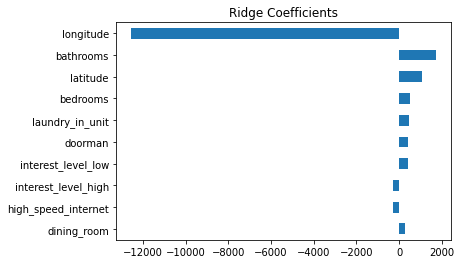

**Note:** Your figure shouldn't be identical to the one above. Your model will have different coefficients since it's been trained on different data. Only the formatting should be the same.

In [36]:
coefficients = model_r.coef_
features = ohe.get_feature_names() # it's a list
feature_importance = pd.Series(coefficients, index=features).sort_values(key=abs)

/usr/local/lib/python3.10/dist-packages/category_encoders/utils.py:362: FutureWarning: `get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.
  warnings.warn("`get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.",


<Axes: >

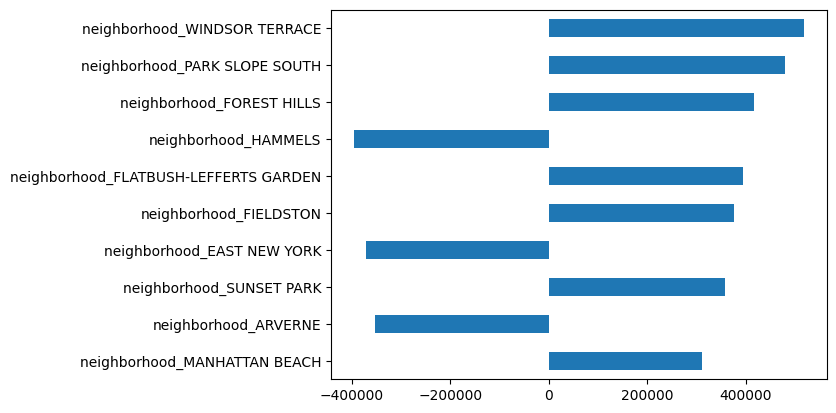

In [38]:
feature_importance.tail(10).plot(kind='barh') # bar H means horizontal bar chart. Tail(10) is the largest 10